<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Statistic/US_finance_analysis_A01703366.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Importando los datos


In [113]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [114]:
drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/MyDrive/DataSetIA/US_dataset"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/DataSetIA/US_dataset
/content/gdrive/MyDrive/DataSetIA/US_dataset
dataus2023.csv	firmsus2023.csv


In [115]:
data = pd.read_csv('dataus2023.csv')
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.33,104.00,"452,000.00",NaN,2000
1,A,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",0.00,0.00,"161,000.00",...,"5,057,000.00","1,622,000.00","2,679,000.00","2,186,000.00",0.00,44.91,73.75,"452,271.97","1,453,000.00",2000
2,A,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",0.00,0.00,"244,000.00",...,"5,344,000.00","1,762,000.00","2,925,000.00","2,510,000.00",0.00,29.80,48.94,"453,014.58","1,581,000.00",2000
3,A,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",0.00,0.00,"407,000.00",...,"5,655,000.00","1,853,000.00","3,160,000.00","2,758,000.00",0.00,33.34,54.75,"456,366.38","1,741,000.00",2000
4,A,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00","-25,000.00",0.00,"119,000.00",...,"5,461,000.00","2,129,000.00","3,667,000.00","3,070,000.00",0.00,18.71,30.73,"456,769.74","1,821,000.00",2001


In [116]:
firms = pd.read_csv('firmsus2023.csv')
firms.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.10,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [117]:
data['adjprice'].describe()

count         241,587.00
mean          134,575.39
std        14,463,268.57
min                 0.00
25%                 9.71
50%                20.28
75%                40.53
max     3,505,859,375.00
Name: adjprice, dtype: float64

In [118]:
firms_selected=firms[["empresa","Nombre","status","naics1"]]
firms_selected.columns=['firm',"Empresa","status","industria"]
data =firms_selected.merge(data, on='firm', how='left')
data['qy'] = data['q'].str[:4]
data['qn'] = data['q'].str[5]
data.head()

,firm,Empresa,status,industria,q,fiscalmonth,revenue,cogs,sgae,otherincome,...,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qy,qn
0,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.33,104.00,"452,000.00",NaN,"2,000.00",2000,1
1,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q2,6.00,"4,731,000.00","2,421,000.00","1,925,000.00","73,000.00",...,"2,679,000.00","2,186,000.00",0.00,44.91,73.75,"452,271.97","1,453,000.00","2,000.00",2000,2
2,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q3,9.00,"7,401,000.00","3,790,000.00","3,016,000.00","101,000.00",...,"2,925,000.00","2,510,000.00",0.00,29.80,48.94,"453,014.58","1,581,000.00","2,000.00",2000,3
3,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q4,12.00,"10,773,000.00","5,522,000.00","4,198,000.00","111,000.00",...,"3,160,000.00","2,758,000.00",0.00,33.34,54.75,"456,366.38","1,741,000.00","2,000.00",2000,4
4,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2001q1,3.00,"2,841,000.00","1,449,000.00","1,113,000.00","19,000.00",...,"3,667,000.00","3,070,000.00",0.00,18.71,30.73,"456,769.74","1,821,000.00","2,001.00",2001,1


Hasta este punto tenemos un dataframe Data con los datos en bruto y las tablas unidas.

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533089 entries, 0 to 533088
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   firm                533089 non-null  object 
 1   Empresa             533089 non-null  object 
 2   status              533089 non-null  object 
 3   industria           533089 non-null  object 
 4   q                   533088 non-null  object 
 5   fiscalmonth         240848 non-null  float64
 6   revenue             240837 non-null  float64
 7   cogs                240837 non-null  float64
 8   sgae                209734 non-null  float64
 9   otherincome         240837 non-null  float64
 10  extraordinaryitems  209734 non-null  float64
 11  finexp              240837 non-null  float64
 12  incometax           240837 non-null  float64
 13  totalassets         240842 non-null  float64
 14  currentassets       234044 non-null  float64
 15  inventory           198227 non-nul

## 0.1 Tranformando los tipos de datos

In [120]:
data['qdate']=pd.PeriodIndex(data.q, freq='Q')
#data['qdate'].tail()

In [121]:
#data.info()

Con esto verificamos que tenemos todos los tipos de datos numéricos, los cuartos como qdate y las únicas variables de strin son la firma y q

## 0.2 Analizando el estado de nuestro dataset

In [122]:
print(data.shape)

(533089, 27)


Tenemos un dataset que cuenta con **533 089** registro y 36 columnas.
Dado que cada empresa aparece 4 veces al año tenemos alrededor de 133,000 registros de una empresa en un año.

Veamos cuantós valores nulos tenemos por columna.

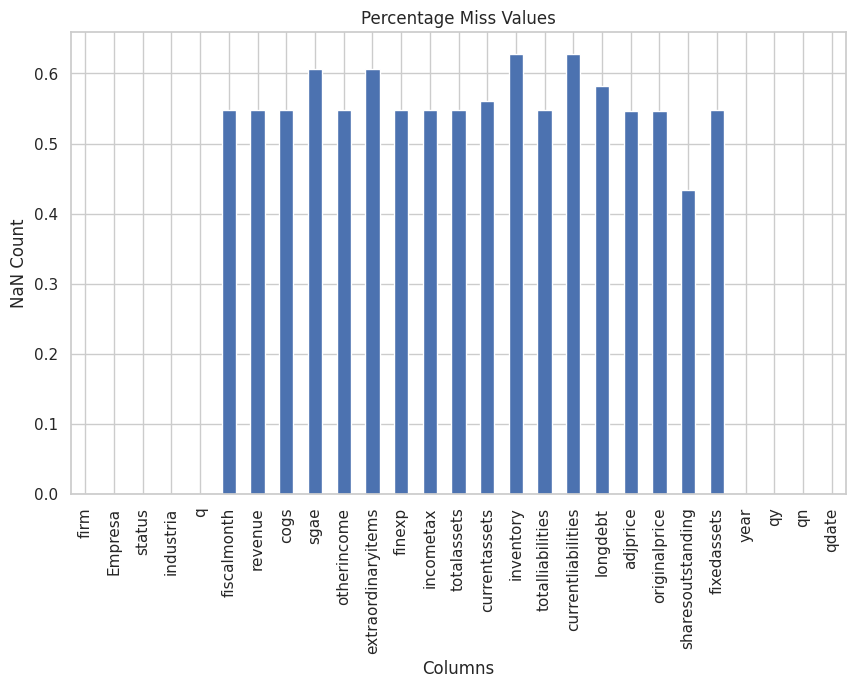

In [123]:
df = pd.DataFrame(data)

# Count the number of NaN values per column
total=df.shape[0]
nan_counts = df.isna().sum()/total
# Create a bar plot to visualize the NaN counts
nan_counts.plot(kind='bar', figsize=(10, 6), title='Percentage Miss Values')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=90)
plt.show()

Tenemos que a excepción de los valores que identifican la empresa y el periodo tenemos alrededor de un 55% de valores faltantes por columna.

NOTA: Hay de acuerdo a cada análisis que vayamos a hacer hay que depurar que los NaN no afecten los datos que tenemos.


In [124]:
data.groupby('firm').mean().describe()

<ipython-input-124-33697a1aef23>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('firm').mean().describe()


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
count,"5,572.00","5,572.00","5,572.00","4,876.00","5,572.00","4,876.00","5,572.00","5,572.00","5,572.00","5,445.00","4,655.00","5,572.00","4,655.00","5,226.00","5,590.00","5,590.00","5,574.00","5,572.00","5,614.00"
mean,7.43,"1,916,512.50","1,076,801.71","610,236.22","2,630.06","1,291.58","33,447.41","49,694.29","9,599,064.89","1,655,174.67","273,222.06","7,700,400.82","1,127,219.68","2,571,925.72","119,073.21",66.45,"137,811.16","1,223,743.02","2,011.38"
std,0.26,"7,647,643.53","5,384,824.11","2,260,551.69","209,068.12","112,515.59","139,146.42","264,717.11","74,427,908.10","9,368,401.75","1,178,345.78","69,757,616.26","5,672,247.36","47,164,516.25","6,718,943.38","2,526.88","380,111.99","5,209,355.14",0.10
min,3.00,0.00,-64.62,"-227,607.14","-14,130,861.70","-2,947,547.95","-593,523.55","-707,310.34","1,200.58",6.96,0.00,196.39,0.00,0.00,0.21,0.39,612.36,0.00,"2,009.42"
25%,7.42,"45,296.14",499.57,"42,082.70",-622.89,-229.98,0.00,0.00,"257,472.84","82,560.20",0.00,"96,287.39","29,006.82","11,861.79",11.64,9.90,"26,211.51","2,381.66","2,011.38"
50%,7.47,"280,685.51","53,781.53","135,671.77",0.00,0.00,"1,697.56","2,610.07","1,150,624.91","286,390.70","8,429.87","643,304.75","141,195.60","143,200.88",22.20,21.41,"52,007.54","51,485.65","2,011.38"
75%,7.50,"1,126,839.43","490,970.18","406,393.61",969.60,170.01,"21,608.33","23,942.44","3,919,804.83","869,583.33","143,283.59","2,605,925.42","544,942.40","844,166.97",40.08,39.81,"116,833.42","476,858.29","2,011.38"
max,10.80,"253,887,408.60","191,270,569.89","52,305,755.32","3,338,483.87","3,912,500.00","6,293,478.72","9,838,297.87","2,750,921,894.74","328,039,670.21","39,386,043.01","2,734,800,039.47","208,695,473.81","2,656,058,513.16","493,166,309.41","188,893.42","8,971,470.85","178,620,158.98","2,016.40"


In [125]:
data.describe()

,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
count,"240,848.00","240,837.00","240,837.00","209,734.00","240,837.00","209,734.00","240,837.00","240,837.00","240,842.00","234,044.00","198,227.00","240,841.00","198,231.00","222,677.00","241,587.00","241,680.00","301,572.00","240,837.00","533,088.00"
mean,7.45,"3,048,198.12","1,696,367.56","927,494.57","2,654.41","3,892.20","48,051.88","85,843.35","15,318,050.40","2,590,799.58","447,524.29","12,334,019.19","1,710,854.34","4,071,221.58","134,575.39",114.65,"176,094.50","1,946,828.86","2,011.38"
std,3.35,"12,864,718.05","8,963,957.67","3,919,919.84","603,630.87","345,687.92","259,903.17","600,824.65","109,654,475.17","16,981,711.54","1,858,431.53","102,040,160.99","8,017,143.64","66,619,197.08","14,463,268.57","4,495.15","566,828.45","7,899,841.38",6.86
min,0.00,"-4,214,926.00","-736,000.00","-4,390,000.00","-42,662,000.00","-54,512,000.00","-3,785,000.00","-50,571,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-100,762.00","2,000.00"
25%,3.00,"71,261.00",461.00,"41,444.25",-188.00,0.00,0.00,0.00,"364,732.25","89,894.75",0.00,"143,231.00","41,711.50","4,479.74",9.71,10.00,"26,628.09","3,551.00","2,005.00"
50%,6.00,"414,020.00","86,465.00","158,522.50",0.00,0.00,"1,801.00","4,748.00","1,626,927.50","358,262.00","24,819.96","932,592.00","211,756.00","201,367.00",20.28,23.70,"59,837.50","109,040.00","2,011.00"
75%,9.00,"1,712,270.00","717,100.00","541,493.00",530.00,0.00,"28,096.00","40,447.00","5,935,884.50","1,276,000.00","259,400.00","3,899,619.00","859,000.00","1,221,000.00",40.53,45.30,"139,849.99","872,585.00","2,017.00"
max,12.00,"611,289,000.00","463,721,000.00","236,417,000.00","127,482,000.00","15,908,400.00","26,209,000.00","38,805,000.00","4,323,710,000.00","1,056,407,000.00","86,961,000.00","4,254,666,000.00","344,883,235.00","4,242,763,000.00","3,505,859,375.00","537,780.00","98,214,051.00","255,556,000.00","2,023.00"


## 0.3 Configuraciones adicionales


In [126]:
pd.options.display.float_format ='{:,.2f}'.format

# 1.0 Análisis financiero de las empresas de EU

## 1.1 Calculando variables financieras y ratios



Calcuemos el retorno logaritmico anual y trimestral y añadamoslo al dataframe

In [127]:
data['ry']= np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))

In [128]:
data['rq']= np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

In [129]:
# ebit = revenue - cogs - sgae
data['ebit']=data['revenue'] - data['cogs'] - data['sgae']

#opm = ebit / revenue
# data['opm']=data['ebit']/ data['revenue'] -> Hay que hacer las validaciones de que el divisor sea distinton de 0
data['opm']= np.where(data['revenue']==0,np.NaN, data['ebit']/ data['revenue'])

# Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax
data['netincome'] = data['ebit']+ data['otherincome'] +data['extraordinaryitems'] - data['finexp'] -data['incometax']

#Calculate profit margin (ratio) as: pm = ni / revenue
data['pm'] = np.where(data['revenue']==0,np.NaN, data['netincome']/ data['revenue'])

#Calculate asset turn over ratio: ato = revenue / totalassets
data['ato'] = np.where(data['totalassets']==0,np.NaN, data['revenue']/ data['totalassets'])

#Calculate acid ratio: acidratio = currentassets / currentliabilities
data['acidratio']= np.where(data['currentliabilities']==0,np.NaN, data['currentassets']/ data['currentliabilities'])

#Calculate financial leverage ratio as: finlev=longdebt / totalassets
data['finlev'] = np.where(data['totalassets']==0,np.NaN, data['longdebt']/ data['totalassets'])

#Calculate market value as: mvalue = originalprice * sharesoutstanding
data['mvalue']=data['originalprice']*data['sharesoutstanding']

#Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']


In [130]:
#data['ato'].describe()

In [131]:
#¿Por qué el book value puede ser negativo segun la estadistica desriptiva?¿Es posible?
#Sí podemos tener book value negativo. Vease el caso de General Motors Company que sufrió una crisis en 2008 En ese tiempo tampoco tenemos mvalue :(
columns=['firm','q','Empresa','totalassets','totalliabilities','bookvalue','mvalue']
sorted_df = df[columns].sort_values(by='bookvalue', ascending=True)
#print(df[columns][(df['firm']=='GM') & (df['q']>='2007q3')])


## 1.2 Composición de las firmas del mercado financiero de US
1. ¿Cuántas firmas activas tenemos?

2. ¿Qué podemos decir de la firma promedio en terminos de book and market value?
¿Cómo cambian estas variables de acuerdo a cada industria?
¿Como se distribuye el tamaño de las firmas en el valor de mercado?

3. ¿Cuáles son las 10 firmas más grandes en terminos de valor de mercado y que tan alejadas están de la firma tipica de US?

4. Repite el análisis con el valor de libro


### 1.2.1 ¿Cuántas firmas activas hay?


In [132]:
firms[(firms['status']=="activo")].status.count()

3553

**Según el Dataset tenemos que hasta el segundo trimestre de 2023 se tienen registradas 3553 firmas activas**

### 1.2.2
* ¿Qué podemos decir de la firma promedio en terminos de book and market value?
* ¿Cómo cambian estas variables de acuerdo a cada industria?
* ¿Como se distribuye el tamaño de las firmas en el valor de mercado?

Vamos a obtener solo las columnas que nos importan. Firmas, fechas, market value, book value e industria.

In [133]:
df=data.copy()
print(df.columns)
df=df[(df['fiscalmonth']==12) & (df['qy']== '2022')]
df_value=df[['firm','qy','qn','bookvalue','mvalue','Empresa']]
df_value.describe()

Index(['firm', 'Empresa', 'status', 'industria', 'q', 'fiscalmonth', 'revenue',
       'cogs', 'sgae', 'otherincome', 'extraordinaryitems', 'finexp',
       'incometax', 'totalassets', 'currentassets', 'inventory',
       'totalliabilities', 'currentliabilities', 'longdebt', 'adjprice',
       'originalprice', 'sharesoutstanding', 'fixedassets', 'year', 'qy', 'qn',
       'qdate', 'ry', 'rq', 'ebit', 'opm', 'netincome', 'pm', 'ato',
       'acidratio', 'finlev', 'mvalue', 'bookvalue'],
      dtype='object')


,bookvalue,mvalue
count,"3,602.00","3,470.00"
mean,"3,418,241.15","11,604,084.67"
std,"15,751,521.67","66,211,338.09"
min,"-15,848,000.00",46.68
25%,"82,016.75","195,440.99"
50%,"443,316.50","1,130,060.89"
75%,"1,755,404.75","4,804,826.73"
max,"472,360,000.00","2,220,977,926.40"


Nota: Book Value y Market Value están en miles.

Viendo la estádistica descriptiva tenemos que:
- Book value

Tenemos una media de 3 millones con una desviación estándar de 15 millones y una mediana de 443,316.

**El valor de libro de una empresa típica de EU en 2022 es de 443,316,500 dolares**


- Market value
Tenemos una media de 11 millones, desviación estándar de 66 millones y mediana de 1.3 millones.

**El valor de mercado de una empresa típica de EU en 2022 es de 1,130,060,890 dolares**


**Con estos datos podemos tomar en cuenta el valor tipico como la mediana porque la distribución es extrema.**

 Vamos a graficar a escala logaritmica y entender un poco mejor estos datos


¿Como se distribuye el tamaño de las firmas en el valor de mercado? Lo podemos ver a continuación.

<ipython-input-134-c0af16ab9f73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df_value.groupby(['firm']).sum().reset_index()


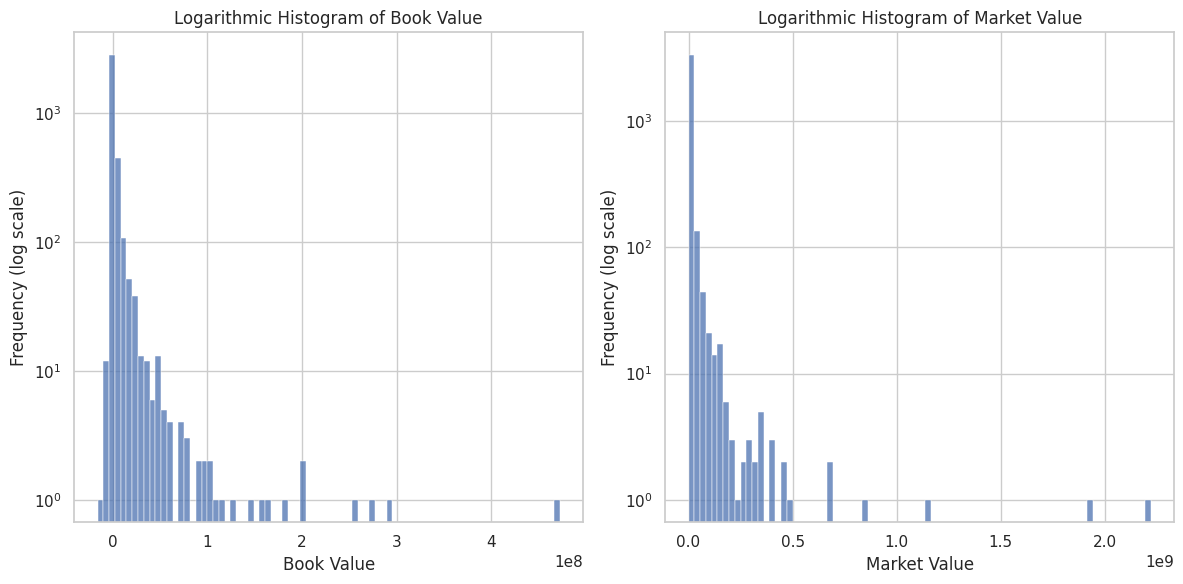

In [134]:
df=df_value.groupby(['firm']).sum().reset_index()
df=df[['bookvalue','mvalue']]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='bookvalue', bins=80, log_scale=(False, True))
plt.xlabel('Book Value')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram of Book Value')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='mvalue', bins=80, log_scale=(False, True))
plt.xlabel('Market Value')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram of Market Value')

plt.tight_layout()
plt.show()

Podemos observar como hay empresas que están a la derecha de la gráfica esto significa que son mucho más grandes que las otras y la magnitud es abismal en ese sentido.

Otra observación que podemos hacer es que la mayor cantidad están pegadas al 0 viendo esto significa que **la moda del book value y market value de las empresas están por debajo de las 7 cifras.**

### 1.2.3 ¿Cuáles son las 10 firmas más grandes en terminos de valor de mercado y que tanto se alejan de la firma típica?

Ahora vamos a analizar cómo es que se comportan las 10 empresas con mayor market value y book value

In [135]:
df=df_value.copy()
df=df.sort_values(by='mvalue', ascending=False)
df=df[['Empresa','mvalue']]
print(df.head(10))


                       Empresa           mvalue
1135                 Apple Inc 2,220,977,926.40
316179          Microsoft Corp 1,920,840,080.06
207230            Alphabet Inc 1,141,960,890.00
28394          Amazon.Com, Inc   856,938,950.78
72864   Berkshire Hathaway Inc   686,574,376.16
338683             Nvidia Corp   684,878,600.00
489576  Unitedhealth Group Inc   495,373,191.52
258801       Johnson & Johnson   461,848,529.18
525960        Exxon Mobil Corp   454,247,764.34
517692             Walmart Inc   409,795,022.35


In [136]:
m=df.iloc[0,1]/df['mvalue'].describe().T['50%']
M=df.iloc[9,1]/df['mvalue'].describe().T['50%']
print("El top 10 de empresas tiene un valor de mercado entre %.2f y %.2f veces el valor de mercado de una empresa típica"%(m,M))

El top 10 de empresas tiene un valor de mercado entre 1965.36 y 362.63 veces el valor de mercado de una empresa típica


### 1.2.4 ¿Cuáles son las 10 firmas más grandes en terminos de valor de libro y que tanto se alejan de la firma típica?

In [137]:
df=df_value.copy()
df=df.sort_values(by='bookvalue', ascending=False)
df=df[['Empresa','bookvalue']]
df.head(10)

,Empresa,bookvalue
72864,Berkshire Hathaway Inc,"472,360,000.00"
259752,Jpmorgan Chase & Co,"292,332,000.00"
53284,Bank Of America Corp,"273,197,000.00"
207230,Alphabet Inc,"256,144,000.00"
525960,Exxon Mobil Corp,"202,473,000.00"
79419,Citigroup Inc,"201,838,000.00"
513135,Wells Fargo & Company,"181,875,000.00"
316179,Microsoft Corp,"166,542,000.00"
127621,Chevron Corp,"160,242,000.00"
28394,"Amazon.Com, Inc","146,043,000.00"


In [138]:

m=df.iloc[0,1]/df['bookvalue'].describe().T['50%']
M=df.iloc[9,1]/df['bookvalue'].describe().T['50%']
print("El top 10 de empresas tiene un valor de libro entre %.2f y %.2f veces el valor de mercado de una empresa típica"%(m,M))

El top 10 de empresas tiene un valor de libro entre 1065.51 y 329.43 veces el valor de mercado de una empresa típica



## 1.3 Evolución del mercado financiero

### 1.3.1 Comportamiento de book value y market value por año



In [139]:
df=data.copy()
df=df[['qy','bookvalue','mvalue','fiscalmonth']]
df=df[(df['fiscalmonth']==12) & (df['qy']<'2023')]
df = df.groupby(['qy']).sum().reset_index()
df_relative=df.copy()
df_relative['mvalue']=df_relative['mvalue']/df_relative['mvalue'][0]
df_relative['bookvalue']=df_relative['bookvalue']/df_relative['bookvalue'][0]


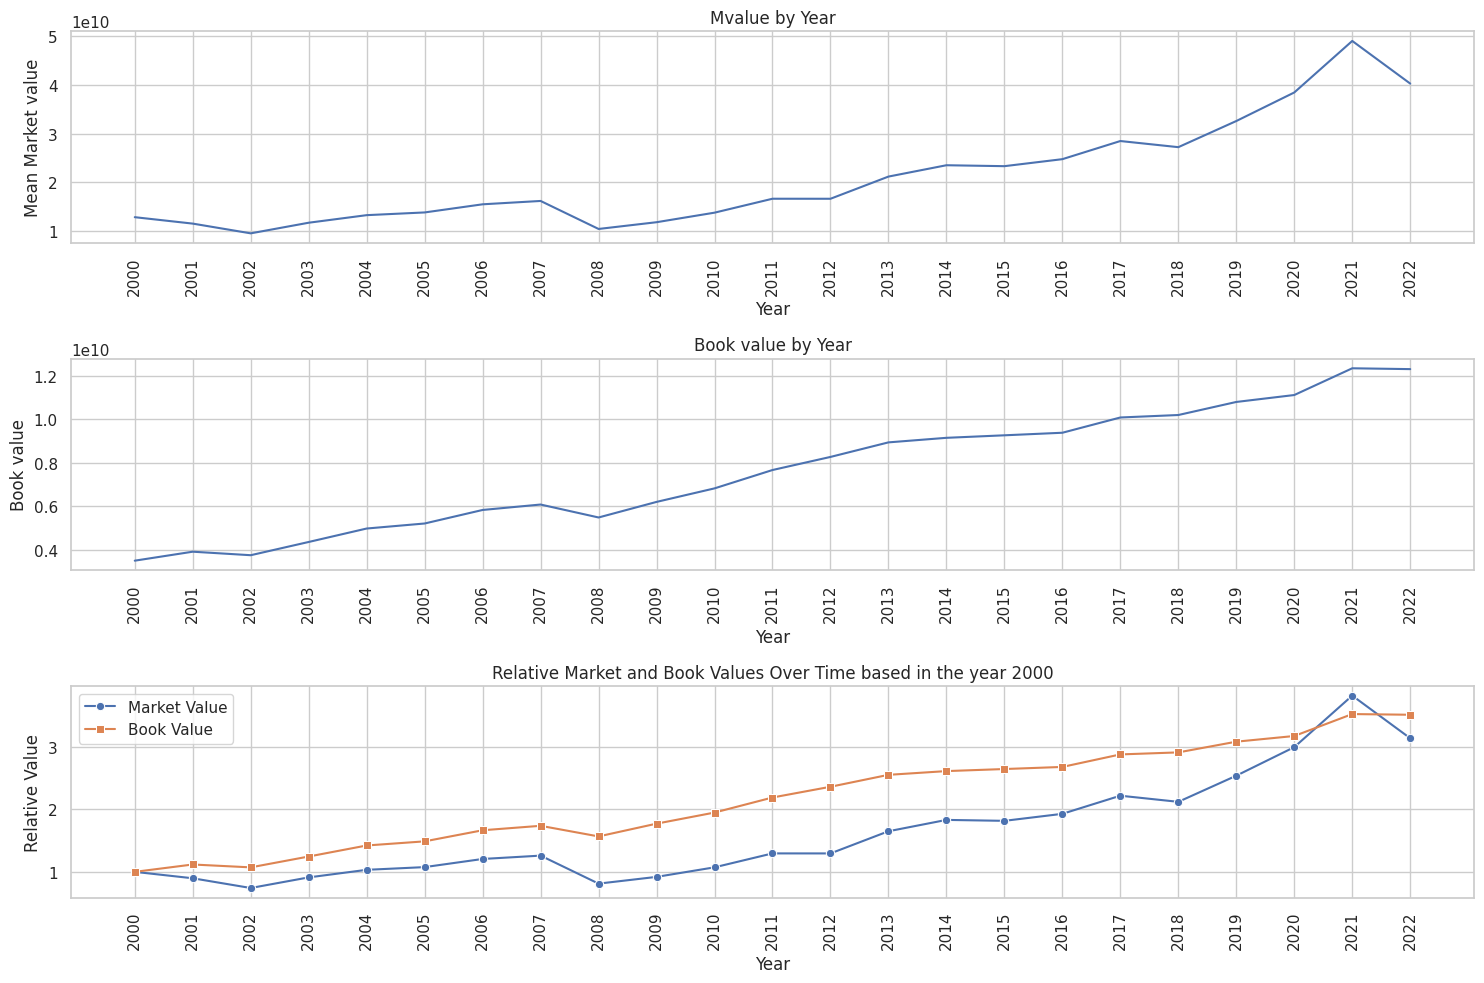

In [140]:
# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

#PARA EL CAMBIO DEL MERCADO A LO LARGO DEL TEIMPO
## Filtro con fiscal month 12.
#SUMA DE LOS DATOS


# PMean Mvalue by Year
sns.lineplot(x='qy', y='mvalue', data=df, ax=axes[0])
axes[0].set_title('Mvalue by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean Market value')
axes[0].tick_params(axis='x', rotation=90)

# Mean book value by Year
sns.lineplot(x='qy', y='bookvalue', data=df, ax=axes[1])
axes[1].set_title('Book value by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Book value')
axes[1].tick_params(axis='x', rotation=90)

#Relative Market and Book Values Over Time based in the year 2000
sns.lineplot(x='qy', y='mvalue', data=df_relative, label='Market Value', marker='o', ax=axes[2])
sns.lineplot(x='qy', y='bookvalue', data=df_relative, label='Book Value', marker='s', ax=axes[2])
axes[2].set_title('Relative Market and Book Values Over Time based in the year 2000')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Relative Value')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()


En esta última gráfica podemos observar que:
*  **El book value ha tenido un mayor creciimiento que el book value comparado con sus valores en el 2000**
*  **Hacía 2023 el book value es casi 50 % más grande que lo que era en el año 2000 y con tendencia de seguir creciendo.**
*  **Hacía el 2023 el market value es apenas más grande que lo que era en el 2000 y con tendencia de seguir creciendo.**


### 1.3.2 ¿Cómo las ganancias totales e ingreso neto de las firmas de EU ha cambiado a tráves de los años?


In [141]:
df=data.copy()
df=df[['qy','revenue','netincome','fiscalmonth']]
df=df[(df['fiscalmonth']==12) & (df['qy']<'2023')]
df = df.groupby(['qy']).sum().reset_index()
df_relative=df.copy()
df_relative['revenue']=df_relative['revenue']/df_relative['revenue'][0]
df_relative['netincome']=df_relative['netincome']/df_relative['netincome'][0]


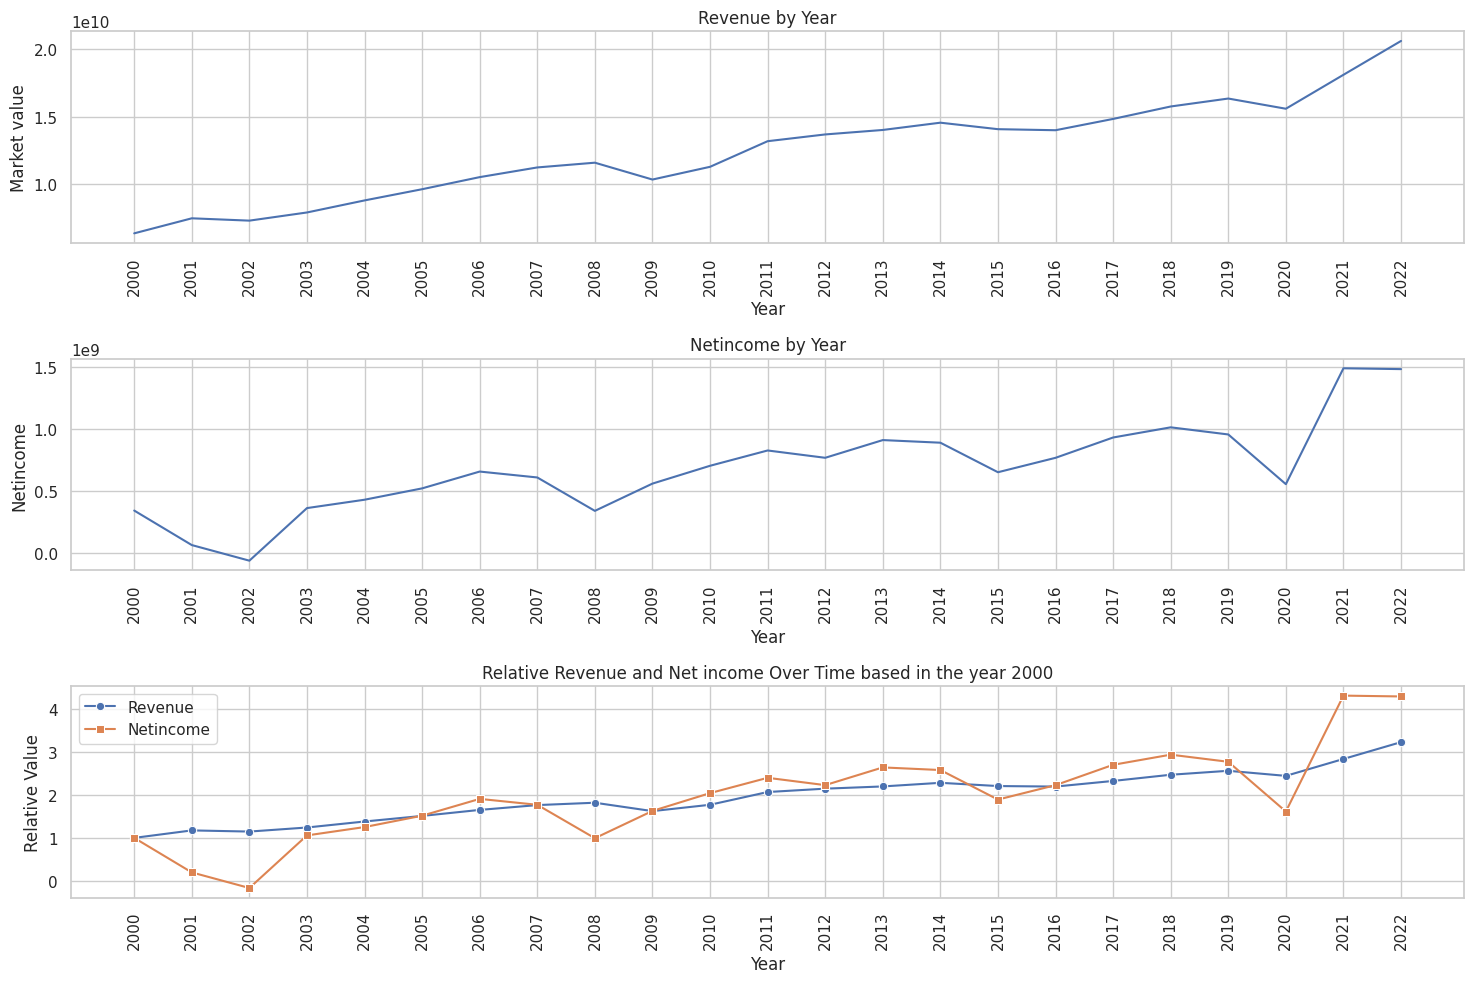

In [142]:
# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Revenue value by Year
sns.lineplot(x='qy', y='revenue', data=df, ax=axes[0])
axes[0].set_title('Revenue by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Market value')
axes[0].tick_params(axis='x', rotation=90)

# Netincome value by Year
sns.lineplot(x='qy', y='netincome', data=df, ax=axes[1])
axes[1].set_title('Netincome by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Netincome')
axes[1].tick_params(axis='x', rotation=90)

#Relative Market and Book Values Over Time based in the year 2000
sns.lineplot(x='qy', y='revenue', data=df_relative, label='Revenue', marker='o', ax=axes[2])
sns.lineplot(x='qy', y='netincome', data=df_relative, label='Netincome', marker='s', ax=axes[2])
axes[2].set_title('Relative Revenue and Net income Over Time based in the year 2000')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Relative Value')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=90)
# Adjust spacing between subplots
plt.tight_layout()
# Show the combined figure
plt.show()


**Si consideramos unicamente los datos de cierre de año fiscal de las firmas de estados unidos podemos decir que:**

1.   El valor de mercado de las firmas de EU va en aumento
2.   El ingreso neto de las firmas de EU han ido en aumento en los últimos 23 años, muestra una decaída en el 2020 posiblemente por la pandemia.
3.   Si comparamos los útlimos 23 años de revenue y netincome con el año 2000
El ingreso neto que se tuvo en 2022 es 4 veces el del año 2000.
Las ganancias de 2022 son casi alrededor de 2.5 las ganancias que se tuvieron en el año 2000.


## 1.4 Más sobre la industira de manofactura




## 1.4.1 Estadistica descriptiva de la indusrtia de manofactura
Revenue and Ato


Generando el dataset que utilizaremos para analizar la industria manofacturera. Filtraremos las inustrias manofactureras con fin del año fiscal y con fecha antes del 2023

In [143]:
df=data.copy()
df['f1rq']= data['rq'].shift(-1)
df['f1ry']= data['rq'].shift(-4)
df=df[(df['fiscalmonth']==12) & (df['industria']=="Industrias manufactureras")]
#Filtro por indudria
df_ind=df.copy()

In [144]:
firms[(firms['naics1']=="Industrias manufactureras") & (firms['status']=="activo") ].status.count()

1540

Cuantas firmas activas tenemos en la industria. En este caso **tenemos 1540 firmas activas en la industria manofacturera.**

#### Vamos a analizar la estadistica descriptiva de
*   Retorno logaritmico trimestral futuro
*   Retorno logaritmico anual futuro
*   Revenue
*   Asset turn over ratio (ato)

Nos vamos a apoyar de los histogramas de cada campo.

In [145]:
df=df_ind.copy()
df=df[df['qy']=='2022']
column=['f1rq','f1ry','totalassets','revenue','ato','pm','acidratio', 'finlev']
descriptive=df[column].describe().T
descriptive=descriptive.T
print(descriptive)

          f1rq   f1ry    totalassets        revenue      ato        pm  \
count 1,494.00 266.00       1,555.00       1,555.00 1,555.00  1,321.00   
mean     -0.04  -0.00   6,247,282.17   4,612,871.36     0.62    -16.65   
std       0.38   0.22  24,202,455.83  20,983,358.25     0.66    154.86   
min      -2.34  -1.23          80.37        -418.00    -0.01 -3,857.75   
25%      -0.18  -0.09     103,929.50       7,015.00     0.08     -0.95   
50%      -0.00   0.01     467,804.00     221,170.00     0.54      0.00   
75%       0.15   0.12   2,454,192.00   1,974,900.00     0.91      0.09   
max       2.17   0.94 369,067,000.00 413,680,000.00    13.56  1,245.78   

       acidratio   finlev  
count   1,552.00 1,555.00  
mean        4.96     0.23  
std         6.35     0.76  
min         0.01     0.00  
25%         1.68     0.03  
50%         2.69     0.15  
75%         5.62     0.31  
max        67.02    28.66  


Estadistica descriptiva de revenue y ato.
Por una parte las ganancias de una empresa típica de la industria manofacturera ronda en

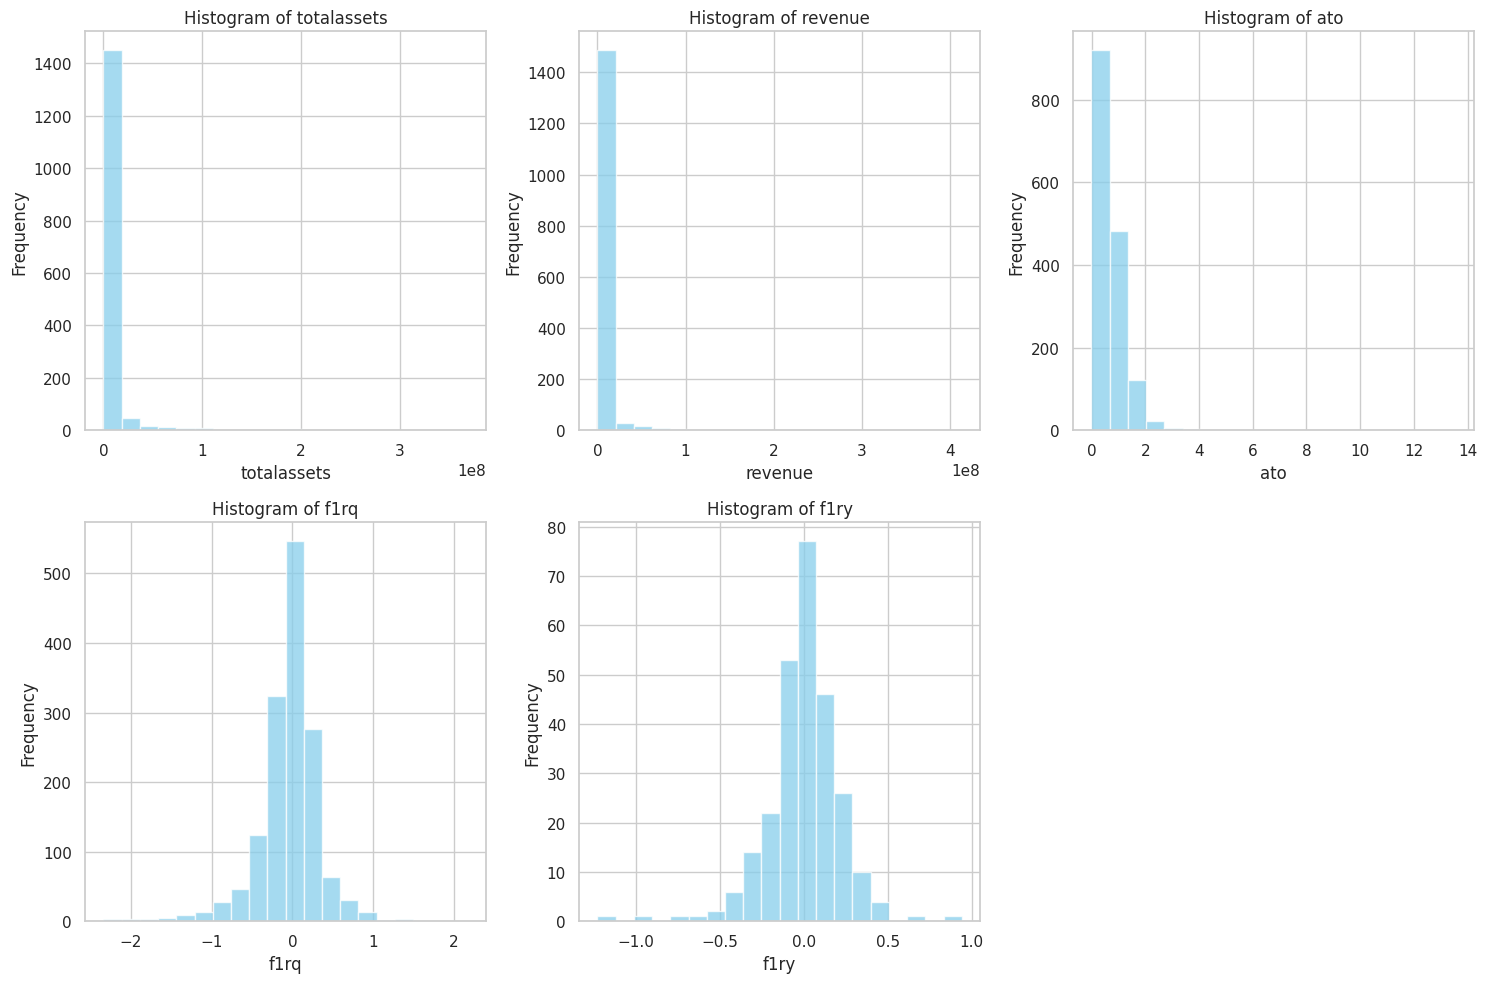

In [146]:
# Create histograms
analized=['totalassets','revenue', 'ato','f1rq','f1ry']
plt.figure(figsize=(15, 10))
for i, column in enumerate(analized):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[column], bins=20, color='skyblue', alpha=0.75)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


En principio tenemos dos comportamientos. **Unas variables siguen distribución normal y otras se comportan de manera logaritmica**.

1. Variables con distribución normal:
* Retorno anual futuro
* Retorno trimestral futuro

**Los retornos** tanto trimestrales como anuales **parece que se agrupan de manera normal alrededor del 0**. Podemos comporbarlo ya que sus medias son 0 y -0.1.

Además notamos que **hay valores extremos**. Que están a más de 3 desviaciones estándar de sus respectivas medias. Lo que significa que **tienen mayor riesgo de lo que una distribución normal puede predecir**.

2. Variables con comportamiento logaritmico

* Total assets
* Revenue
* Ato

 El comportamiento de estas variables hace sentido. Ya que se trata de ingresos totales y ganancias. Como ya pudimos ver en **la empresa típica de los EU, hay muchas empresas que ganan poco y pocas que ganan mucho y esto se ve refleajado en las ganancias y activos totales.**

Finalmente el ATO que es un ratio que se calcula dividiendo las ganacias entre los activos. Esto mide la capacidad de aumentar la empresa con base en los recursos que tiene la empresa. Y aqui podemos ver que dentro de la industria manofacturera el ato más grande es de 13.56 , y la mediana 0.54 que en este caso representa la empresa típica.

Podemos decir que **La empresa manofacturera típica gana 54% sus activos entre cada año fiscal**. Aunque la no podemos generalizar este comportamiento pues así como las ganancias entre empresas las magnitudes son muy variables teniendo en cuenta que hubo un empresa que hizo 13.56 veces sus activos como ganancia en un año.


#### 1.4.2 Matriz de correlación de nuestra variables con totalassets, revenue & netincome logaritmicos usando todos los años
¿Cual variable tiene la mayor correlación lineal de las predicciones de retorno anual y trimestral?

In [147]:
df=df_ind.copy()
df['ry']=np.log(data['adjprice'])-np.log(data.groupby('firm')['adjprice'].shift(4))
df['rq']=np.log(data['adjprice'])-np.log(data.groupby('firm')['adjprice'].shift(1))
df['f1rq']= data['rq'].shift(-1)
df['f1ry']= data['rq'].shift(-4)
df['totalassets'] = np.where(df['totalassets'] > 0, np.log(df['totalassets']), np.nan)
df['revenue']=np.where(df['revenue'] > 0, np.log(df['revenue']), np.nan)
df['netincome']=np.where(df['netincome'] > 0, np.log(df['netincome']), np.nan)
column=['totalassets','revenue','ato','pm','acidratio', 'finlev','f1rq','f1ry']
df=df[column]
df_ind_y=df.copy()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


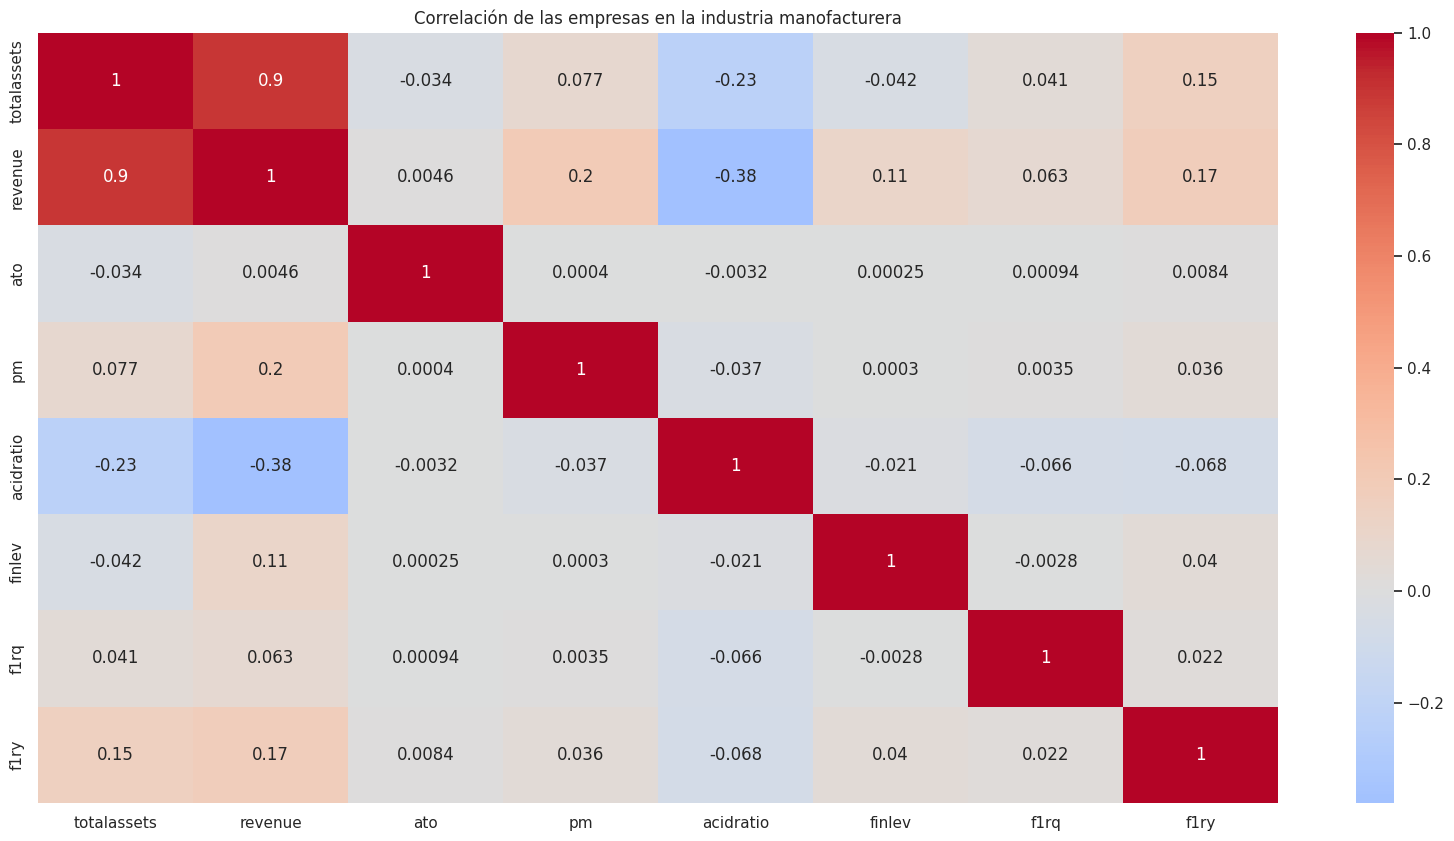

In [148]:
correlation_matrix = df.corr()

# Set up the heatmap figure
plt.figure(figsize = (20, 10))

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)

# Show the plot
plt.title("Correlación de las empresas en la industria manofacturera")
plt.show()

Las variables con mayor corelación al retorno trimestral:
- revenue 0.17
- totalassets 0.15
- acidratio -0.068
- finlev 0.04

In [149]:
df=df_ind_y.copy()
df[['totalassets','revenue', 'acidratio','finlev']].describe()

,totalassets,revenue,acidratio,finlev
count,"22,852.00","21,189.00","22,814.00","22,851.00"
mean,13.41,13.06,4.26,0.23
std,2.33,2.80,5.97,3.55
min,-2.70,-3.04,0.00,0.00
25%,11.82,11.44,1.67,0.00
50%,13.55,13.57,2.53,0.14
75%,14.98,14.95,4.47,0.29
max,20.50,19.96,132.76,387.79


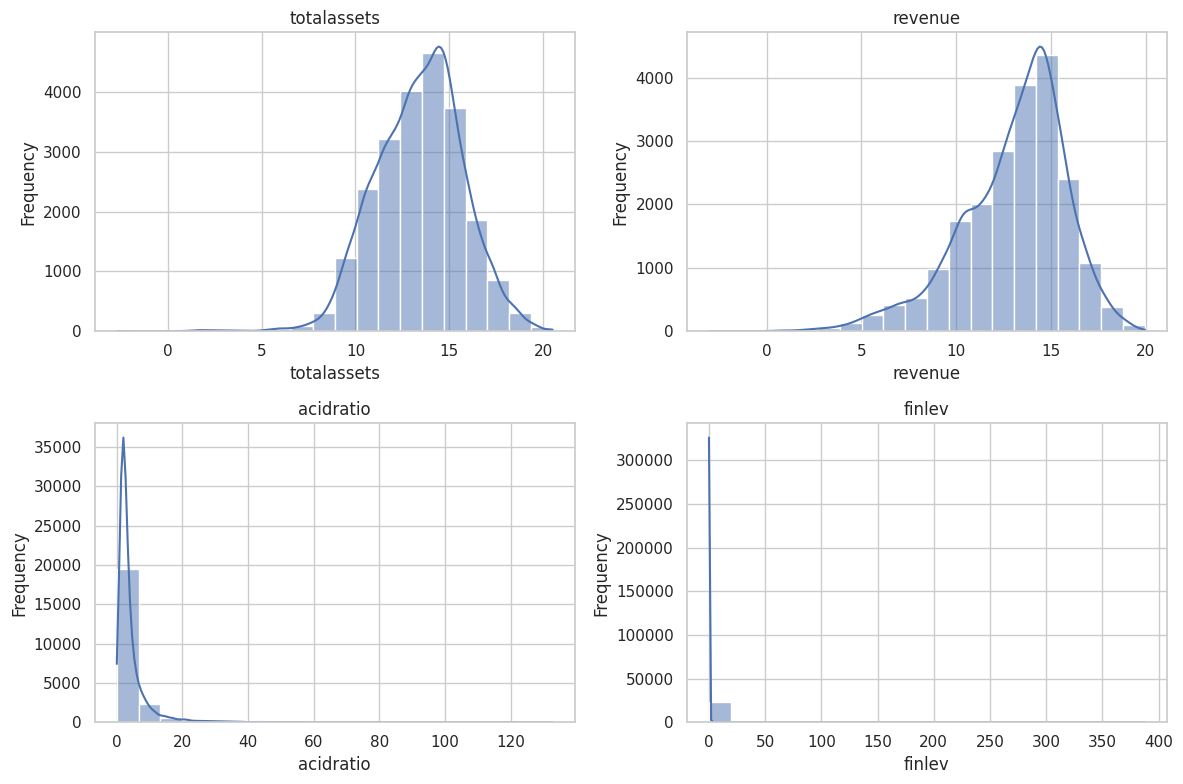

In [150]:
analized=['totalassets','revenue', 'acidratio','finlev']
data_to_plot = df[analized]

# Create a pair of histograms using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a 2x2 grid of histograms
for i, col in enumerate(data_to_plot.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=data_to_plot[col], bins=20, kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
# Adjust subplot layout
plt.tight_layout()
# Show the plot
plt.show()

Aqui podemos observar que total assets y revenue se comportan de manera normal debido a que aplocamos una función logaritmica. De la misma manera tenemo que los valores de acid ratio y finlev tienen extremos muy marcados. Así como ya hemos mencionado antes tenemos medias mucho menores a las desviaciones estándares, valores máximos y minimos extremos y medianas muy alejadas de la media. Todo esto ocasionado por la diferencia de tamaño entre las firmas del sector. Para esto vamos a limpiar los datos extremos.


Limpieza de datos extremos en acid ratio y finlev.

In [151]:
df=df_ind_y.copy()
print(df.sort_values(by='acidratio', ascending=True)['acidratio'].head(10))
print(df.sort_values(by='acidratio', ascending=False)['acidratio'].head(10))

75780    0.00
3380     0.00
55176    0.00
75772    0.00
75776    0.00
75768    0.00
248026   0.00
3376     0.00
523561   0.00
469701   0.00
Name: acidratio, dtype: float64
269715   132.76
270958   119.17
160392   118.50
160388   117.07
360301    91.54
241507    90.01
29528     89.61
298816    89.38
141772    85.66
483777    84.09
Name: acidratio, dtype: float64


In [152]:
df=df_ind_y.copy()
print(df.sort_values(by='finlev', ascending=True)['finlev'].head(10))
print(df.sort_values(by='finlev', ascending=False)['finlev'].head(10))
df.loc[df['finlev'] > 28.66, 'finlev'] = 28.66
df.loc[df['finlev'] == 0, 'finlev'] = np.nan


3        0.00
75579    0.00
75575    0.00
272784   0.00
272788   0.00
272792   0.00
272796   0.00
272800   0.00
75583    0.00
272808   0.00
Name: finlev, dtype: float64
43835    387.79
55172    367.21
380103    28.66
469701    18.06
380099    13.54
385981    13.40
506166    10.83
55164     10.34
380095     9.46
506158     8.20
Name: finlev, dtype: float64


In [153]:
df_ind_y=df


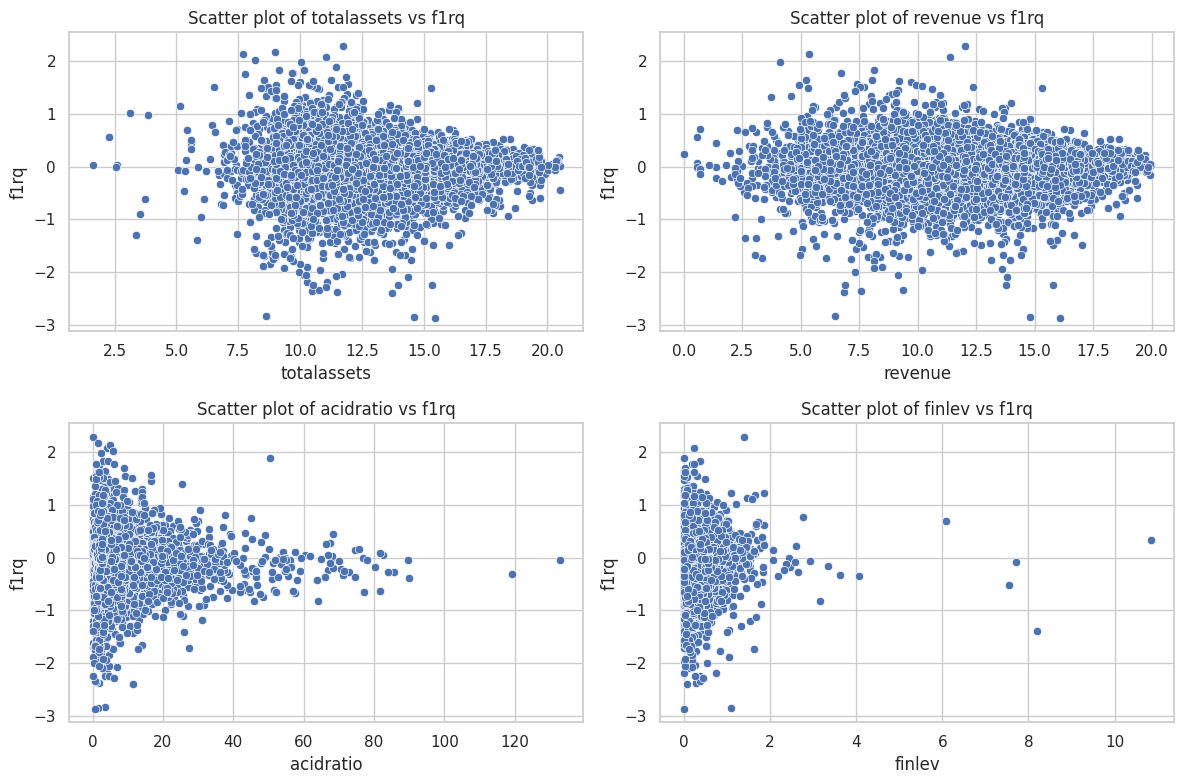

In [154]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a 2x2 grid of scatter plots
for i, col in enumerate(analized):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=col, y='f1rq', data=df)
    plt.title(f'Scatter plot of {col} vs f1rq')
    plt.xlabel(col)
    plt.ylabel('f1rq')

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

## 1.4 Modelo de predicción del retorno trimestral


### 1.4.1 Preparación de los datos

Tenemos que las variables con mayor correlación al retorno trimestral son: El retorno anual, total assets, revenue, acid ratio y financial leverage ratio. En este caso como lo vimos en el histograma anterior vamos a transformar a logaritmo los valores de los ratios porque son muy grandes.

In [155]:
df=df_ind_y.copy()
analized=['totalassets','revenue', 'acidratio','finlev','f1rq']
df=df[analized]
df.describe()

,totalassets,revenue,acidratio,finlev,f1rq
count,"22,852.00","21,189.00","22,814.00","17,764.00","21,961.00"
mean,13.41,13.06,4.26,0.25,-0.00
std,2.33,2.80,5.97,0.51,0.32
min,-2.70,-3.04,0.00,0.00,-2.86
25%,11.82,11.44,1.67,0.09,-0.13
50%,13.55,13.57,2.53,0.21,0.02
75%,14.98,14.95,4.47,0.33,0.15
max,20.50,19.96,132.76,28.66,2.29


### 1.4.2 Modelo de regresión para predecir el retorno trimestral

**Variable dependiente:**

*   Retorno trimestral

**Variables independientes**

*   Revenue
*   Total assets
*   acidratio
*   finlev


In [163]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[["revenue", "totalassets","acidratio","finlev"]]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1rq"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()



In [164]:
# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)


      Variable   VIF
0        const 39.74
1      revenue  3.10
2  totalassets  3.04
3    acidratio  1.08
4       finlev  1.01


In [165]:
# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     34.07
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           2.16e-28
Time:                        04:15:28   Log-Likelihood:                -5744.9
No. Observations:               21961   AIC:                         1.150e+04
Df Residuals:                   21956   BIC:                         1.154e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0384      0.014     -2.718      

### 1.4.3 ¿Qué es multicolinearidad?
La multicolinearidad en un modelo de regresión consiste en tener dos variables muy realcionadas entre si que no aportan mucha información. Tener variables con alta colinearidad causan mayor error en los modelos de predicción y dificultad en las predicciones. Una de las maneras de identificar colinearidad es si el Factor de Inflación de la Varianza (VIF) es mayor que 1.

Encontramos en este caso que revenu y total assets son colineales. Esto tambien se puede ver en la matriz de correlación. Ahora bien, para mejorar el modelo vamos a eliminar totalassets

### 1.4.4 Modelo de regresión mejorado

In [167]:
df=df_ind_y.copy()
analized=['revenue', 'acidratio','finlev','f1rq']
df=df[analized]

X = df[["revenue","acidratio","finlev"]]
# Add a constant term (intercept) to the features
X = sm.add_constant(X)
X.fillna(X.mean(), inplace=True)
# Define your target variable (dependent variable)
y = df["f1rq"]
# Create and fit the linear regression model
model = sm.OLS(y, X, missing="drop").fit()


In [170]:
X.describe()

,const,revenue,acidratio,finlev
count,"22,854.00","22,854.00","22,854.00","22,854.00"
mean,1.00,13.06,4.26,0.25
std,0.00,2.70,5.96,0.45
min,1.00,-3.04,0.00,0.00
25%,1.00,11.66,1.67,0.13
50%,1.00,13.31,2.53,0.25
75%,1.00,14.84,4.46,0.29
max,1.00,19.96,132.76,28.66


In [168]:
# Calculate the VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)

    Variable   VIF
0      const 29.43
1    revenue  1.08
2  acidratio  1.08
3     finlev  1.00


Como podemos comprobar hemos resuelto los problemas de multicolinealidad

In [169]:
# Get the model summary
model_summary = model.summary()
# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   f1rq   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     44.07
Date:                Sat, 09 Sep 2023   Prob (F-statistic):           2.19e-28
Time:                        04:21:11   Log-Likelihood:                -5747.0
No. Observations:               21961   AIC:                         1.150e+04
Df Residuals:                   21957   BIC:                         1.153e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0536      0.012     -4.505      0.0

### Interpretación de las variables del modelo

Encontramos que las variables revenue y acidratio son estadisticamente significativas para el modelo de predicción. Ya que tienen un p value menor a 0.05. Además las ganancias el coeficiente de alfa de revenue se mantien positivo en el intervalos de confianza. Por lo que podemos decir que
**Las ganancias impactan el retorno trimestral. Si las gananacias aumentan el retorno tambien.**
Sucede lo opuesto con el acidratio. Ya que su intervalo de confianza se mantiene en números negativos. Lo que guarda un proporcionalidad inversa.
Lo que sugiere que
**Entre más pequeña sea la capacidad de liquidación de una empresa de sus deudas a corto plazo mayor serán sus retorno trimestral** En este caso el coeficiente se puede ver sesgado por la distribución de datos como vimos en los histogramas de la sección 1.4.2.

**Finalmente encontramos que el coeficiente del nivel de apalancamiento financiero no presenta evidencia estadistica significativa para influir en los retornos trimestrales.** Además su intervalo de confianza 95% contiene al cero, lo que tampoco deja claro conforme esta variable dependiente aumenta la independiente disminuye o no.

**Como el coeficiente de correlación R^2 es 0.006, esto indica que las predicciones de nuestro modelo son muy poco acertadas**

### Conclusión
**Predecir el retorno trimestral con un modelo de regresión lineal usando las variables de revenue, ratio de liquidación y nivel de apalancamiento no generó buenos resultados para predecir los retornos trimestrales de las empresas manofacturaras**